<a href="https://colab.research.google.com/github/rpedram/data-science/blob/main/Applied%20Data%20Science%20with%20Python/Marketing%20Problem%20Project/Marketing_Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Marketing Campaign: Proj 1 Col Rakesh Pedram

In [ ]:
# @title Default title text
# prompt: import file from google drive into pandas data frame

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get the file path from Google Drive
file_path = '/content/drive/My Drive/Dataset/marketing_data.csv'

# Read the file into a Pandas DataFrame
df = pd.read_csv(file_path)
print(df.head())
print(df.info())
# Describe numerical variables to check for missing values, outliers, etc.
print(df.describe())
#df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
print(df.info())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   0        1985  Graduation       Together  70951.0        0         0   
1   1        1961  Graduation         Single  57091.0        0         0   
2   9        1975      Master         Single  46098.0        1         1   
3  13        1947      Master         Single  25358.0        0         1   
4  24        1960      Master       Together  17144.0        1         1   

  Dt_Customer  Recency  MntWines  ...  NumStorePurchases  NumWebVisitsMonth  \
0  2013-04-05       66       239  ...                  9                  1   
1  2014-06-15        0       464  ...                  7                  5   
2  2012-08-18       86        57  ...                  2                  8   
3  2013-07-22       57        19  ...                  3                  6   
4  2014-02-15      

This block was for data cleaning run for a import error in Dt Cystomer fd only once if required

In [ ]:
condition = df['Income'] > 68655
df_sorted = df[condition].sort_values(by='Income')

# Display the sorted DataFrame
print(df_sorted['Income'])

1047     68657.0
1158     68695.0
540      68695.0
608      68743.0
858      68805.0
          ...   
574     113734.0
1322    156924.0
610     157146.0
1494    157243.0
1573    666666.0
Name: Income, Length: 429, dtype: float64


In [ ]:
invalid_rows = df.loc[df["Dt_Customer"]== '2013-04-05']
df.loc[0, 'Dt_Customer'] = '2013-04-05'
print(invalid_rows)

In [ ]:
print(df.head())
print(df.info())
df['Education'] = df['Education'].astype(str)
df.convert_dtypes()
# Rename the column
#df.rename(columns={"Money": "Income"}, inplace=True)
df['Marital_Status'] = df['Marital_Status'].astype(str)
df['Country'] = df['Country'].astype(str)
print(df.info())

Convert the 'Dt_Customer field to datetiem64. This is necessary to make computations on dates

In [ ]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])
print (df['Dt_Customer'].dtype)


datetime64[ns]


In [ ]:
# Check no nulls in date field
df[df.notna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,0,1985,Graduation,Together,70951.0,0,0,2013-04-05,66,239,...,9,1,0,0,0,0,0,0,0,SA
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,9,1975,Master,Single,46098.0,1,1,2012-08-18,86,57,...,2,8,0,0,0,0,0,0,0,CA
3,13,1947,Master,Single,25358.0,0,1,2013-07-22,57,19,...,3,6,0,0,0,0,0,0,0,SA
4,24,1960,Master,Together,17144.0,1,1,2014-02-15,96,18,...,4,7,0,0,0,0,0,0,0,SA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,11121,1981,Graduation,Together,19419.0,1,0,2012-10-11,76,2,...,3,9,0,0,0,0,0,0,0,IND
1734,11166,1961,Graduation,Together,49678.0,0,1,2013-02-02,81,229,...,4,7,0,0,0,0,0,0,0,SP
1735,11171,1965,Master,Together,56962.0,2,1,2013-11-10,60,292,...,5,7,0,0,0,0,0,0,0,AUS
1736,11176,1970,Master,Together,65968.0,0,1,2014-12-05,12,376,...,7,3,0,0,0,0,0,0,0,CA


Data cleaning block for converting Income to float

In [ ]:
# This code block is for converting currency to float64.
df['Income'] = df['Income'].str.replace(',', '').str.replace('$', '').str.replace('.', '.', regex=False).astype(str)
print(df['Income'].dtype)
df['Income'].astype(float)

One time upload of my clean csv files ready for analysis. To be run only once.

In [ ]:
df.to_csv(file_path, index=False)

This is trouble shooting code block as after grouping my Dtype of group changed to object and couldnt do mathematical operations of padding data. Refer fillna statement at line 8 which is # commented now

In [ ]:
#print(df['Income'].head())
print(df['Income'].dtype)
#print(df.groupby(['Education', 'Marital_Status'])['Income'].head())
print(df.groupby(['Education', 'Marital_Status'])['Income'].dtype)
#print(df.groupby(['Education', 'Marital_Status'])['Income'].mean())

Find the

Data cleaning. CHeck for unique values in each categotical column

In [ ]:
print(df['Education'].unique())
print(df['Marital_Status'].unique())
print(df['Country'].unique())
#df.columns

['Graduation' 'Master' 'SSC_plus']
['Together' 'Single']
['SA' 'CA' 'SP' 'IND' 'US' 'GER' 'AUS' 'ME']


In [ ]:
# Identified categoroes like YOLO Alone aand Absurd filled durind survey are rationalised
df[df['Marital_Status']=='YOLO']
df.loc[df['Marital_Status']=='YOLO','Marital_Status']="Single"
df[df['Marital_Status']=='Alone']
df.loc[df['Marital_Status']=='Alone','Marital_Status']="Single"
df[df['Marital_Status']=='Absurd']
df.loc[df['Marital_Status']=='Absurd','Marital_Status']="Single"

In [ ]:
# Check the Education field for scope to reduce the dimentionality
df[df['Education']=='2n Cycle']
df.nunique(axis=0)
# Count unique values in the 'Education' column
unique_education_count = len(pd.unique(df['Education']))
print("Number of unique height values:", unique_education_count)
df.loc[df['Education']=='Basic','Education']="SSC"

Number of unique height values: 5


In [ ]:
df.loc[df['Education']=='SSC','Education']="SSC_plus"
df.loc[df['Education']=='2nd Cycle','Education']="SSC_plus"
edn=df[df['Education']=='SSC_plus']
# Club the PHD and Masters into masters
df.loc[df['Education']=='PhD','Education']="Master"
# Now I have just three education categories for my model
df.loc[df['Marital_Status']=='Widow','Marital_Status']="Single"
df.loc[df['Marital_Status']=='Divorced','Marital_Status']="Single"
df.loc[df['Marital_Status']=='Married','Marital_Status']="Together"

Reduce the dimensions of the Marital status to single and Married. Single widow divorced subsumed in single and Married and Together clubbed

In [ ]:
# How to list counts of categories
education_counts = df['Education'].value_counts()
print("Education value counts:\n", education_counts)
# SSC has just 45 respondants. Can i club this category with Diploma as it is just 2% of the

At this stage my csv is clean and I should upload it to my drive to prevent running through the same operation

In [ ]:
df.to_csv(file_path, index=False)

In [ ]:
# Check for missing values and their patterns
print(df.isnull().sum())

print(df.columns.tolist())
# Get current year for age calculation
# import the datetime module
import datetime

# get the current date and time
now = datetime.datetime.now()

# get the current year as a string in YYYY format
year = now.strftime("%Y")
int(year)
df['Year_Birth'] = df['Year_Birth'].astype(np.int64)
df.info()
type(year)

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 18
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64
['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatal

str

In [ ]:
# Check for missing values and their patterns
print(df.isnull().sum())

print(df.columns.tolist())
# Get current year for age calculation
# import the datetime module
import datetime

# get the current date and time
now = datetime.datetime.now()

# get the current year as a string in YYYY format
year = now.strftime("%Y")
year=int(year)
df['Year_Birth'] = df['Year_Birth'].astype(np.int64)


#df['Income'].fillna(df.groupby(['Education', 'Marital_Status'])['Income'].mean(), inplace=True)
#Use transform method as there is mismatch between spae of data frame and the group !!!
df['Income'].fillna(df.groupby(['Education', 'Marital_Status'])['Income'].transform('mean'), inplace=True)
# Alternate to group by
#df['Income'] = df.groupby(['Education', 'Marital_Status'])['Income'].transform(lambda x: x.fillna(x.mean()))
# Create derived variables (e.g., total children, age, total spending) as needed
df['Total_Children'] = df['Kidhome'] + df['Teenhome']
df['Age'] = year-df['Year_Birth']
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds' ]].sum(axis=1)

#Check
print(df.columns.tolist())
print(df.shape)
print(df.info())


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 18
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64
['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatal

In [ ]:
print(df)
print(data)

#Outliers
Understand distr and remove outliers. I will winsorize outliers as deleted fields will create nulls in data


Analyzing column: Age


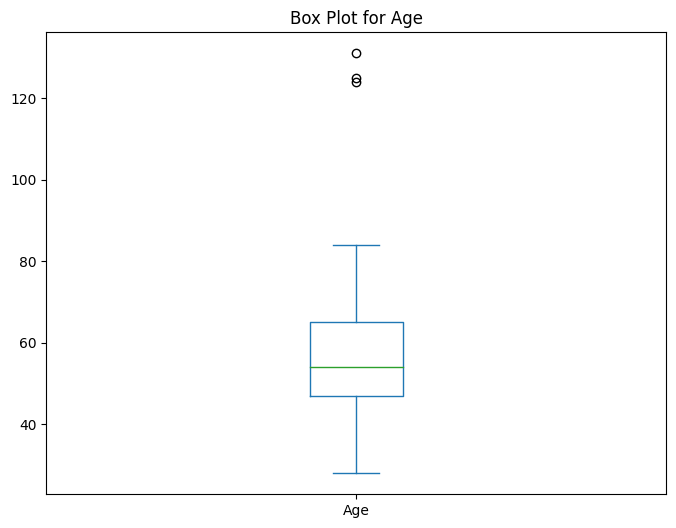

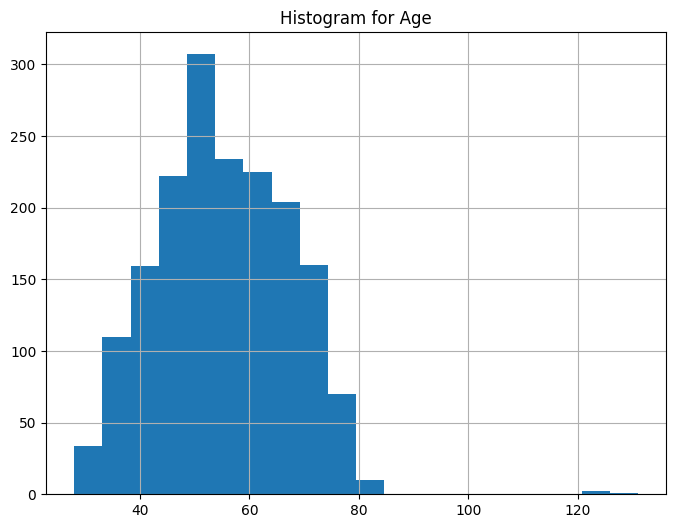


Analyzing column: ID


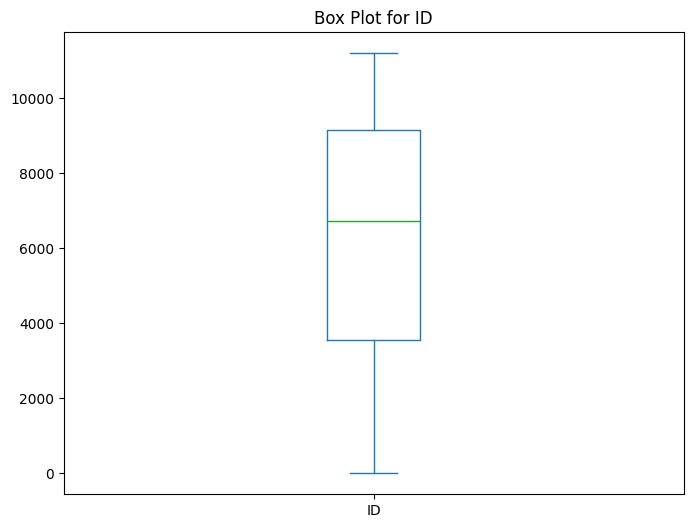

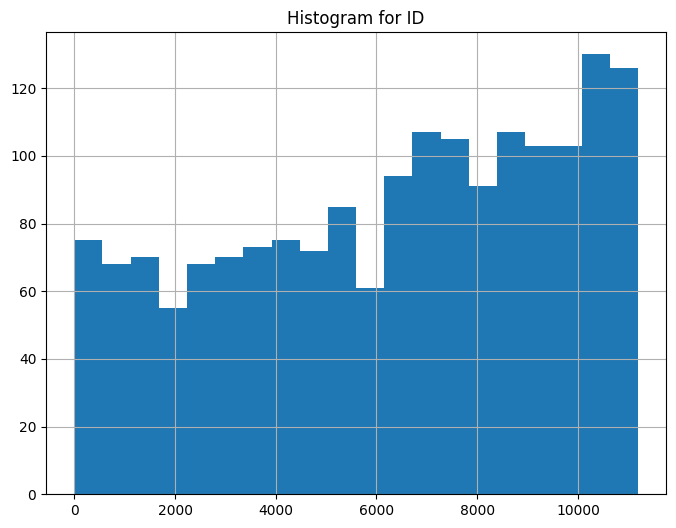


Analyzing column: Income


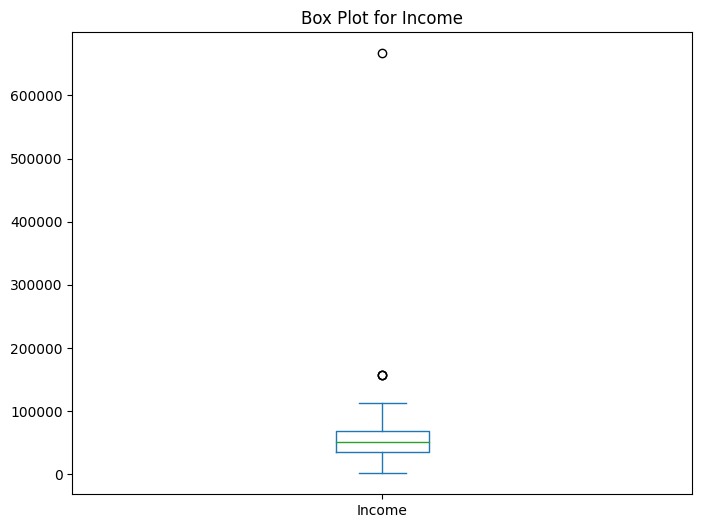

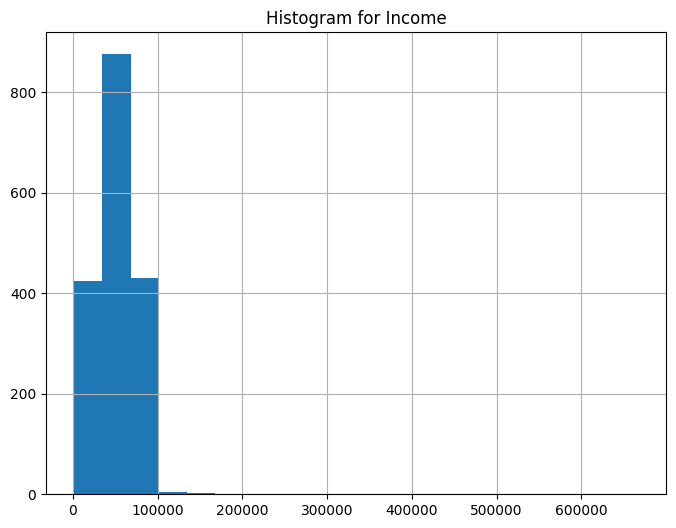


Analyzing column: Kidhome


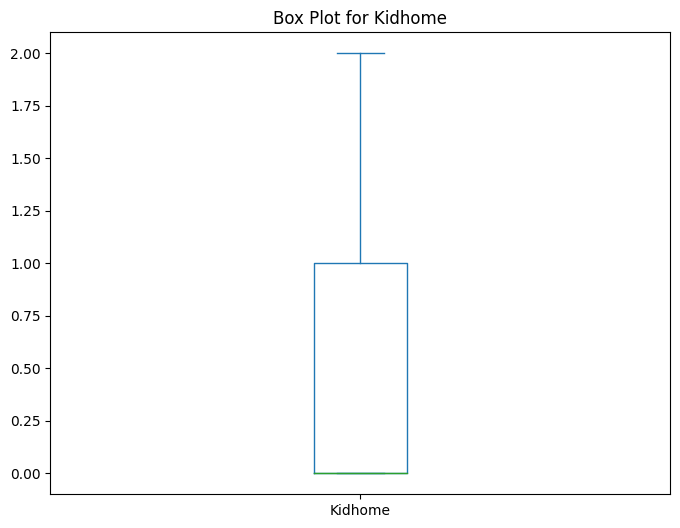

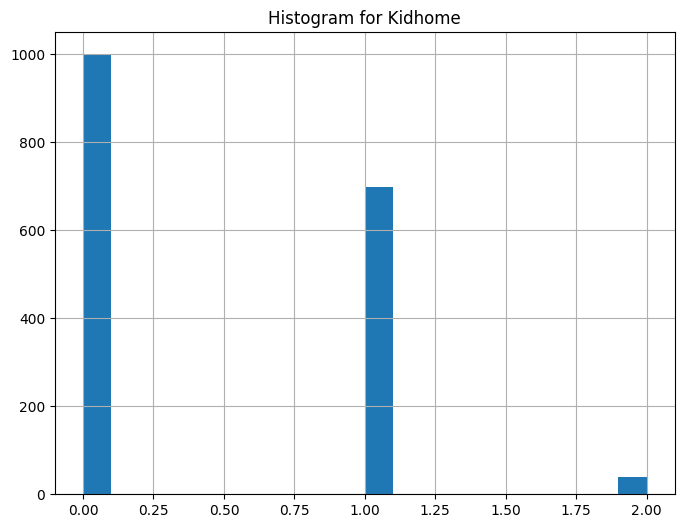


Analyzing column: MntFishProducts


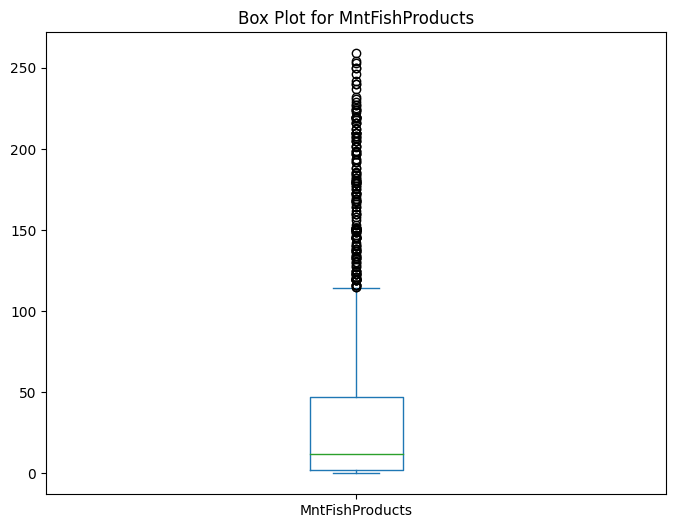

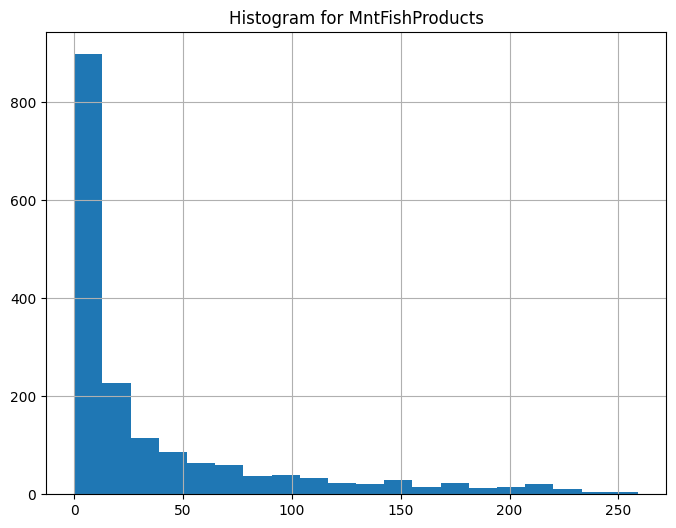


Analyzing column: MntFruits


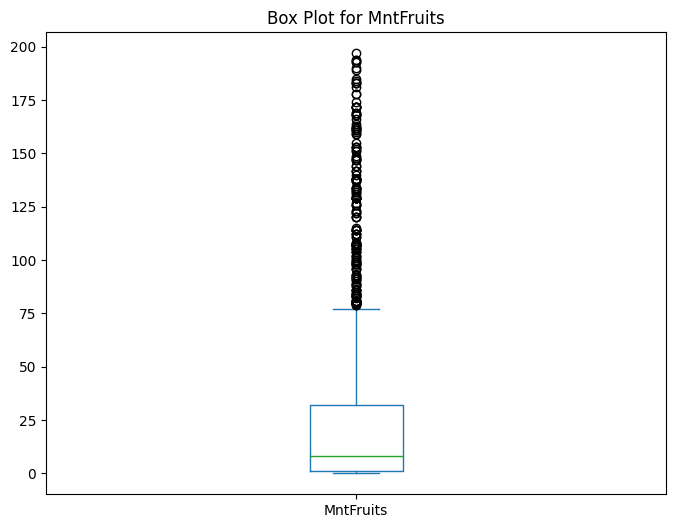

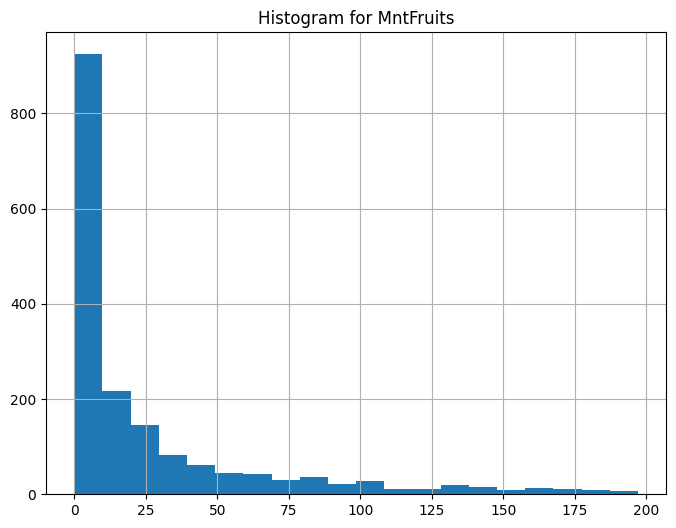


Analyzing column: MntGoldProds


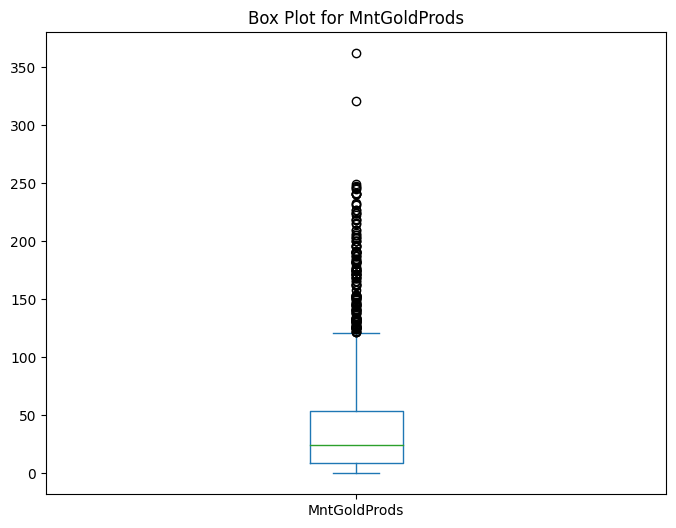

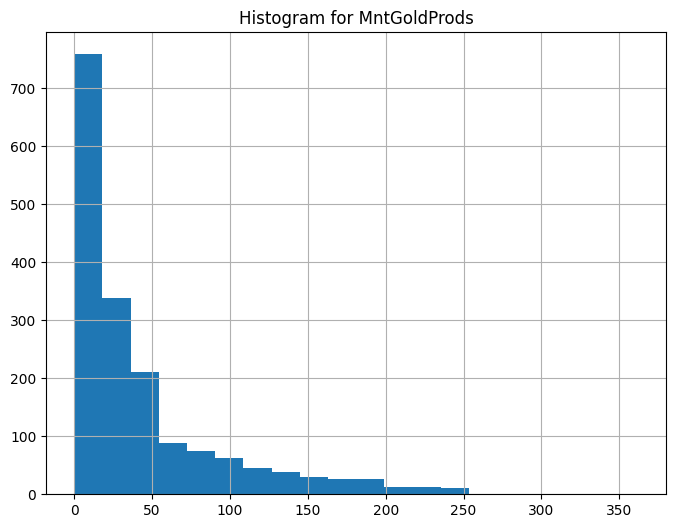


Analyzing column: MntMeatProducts


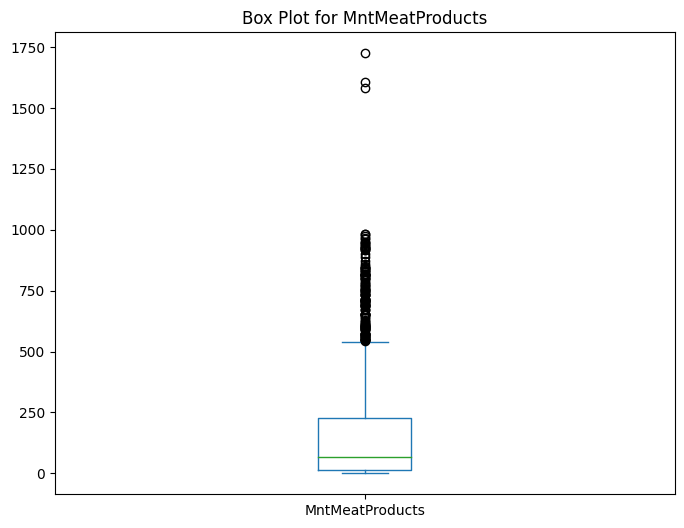

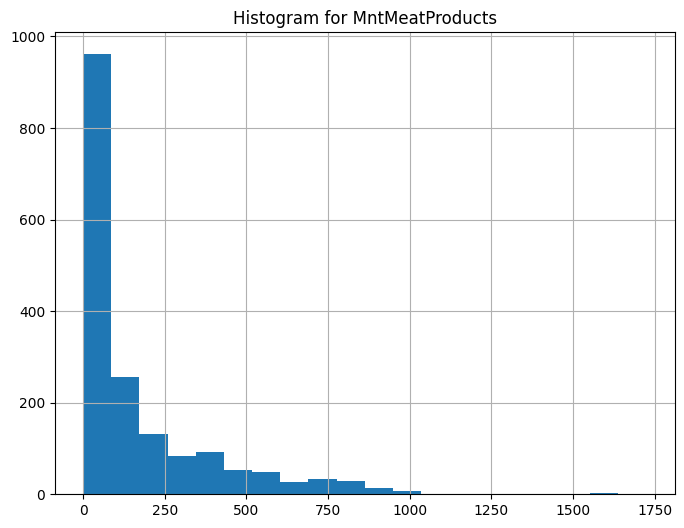


Analyzing column: MntSweetProducts


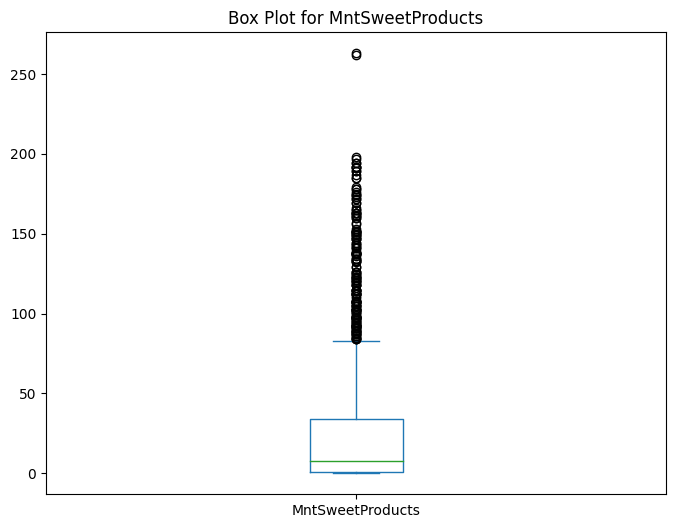

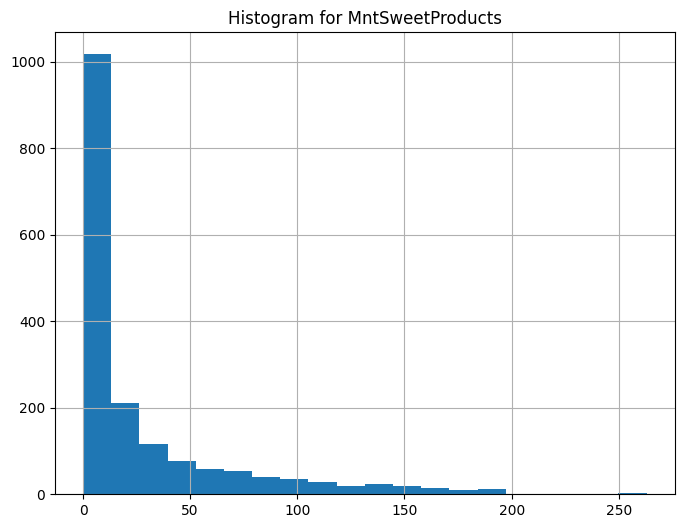


Analyzing column: MntWines


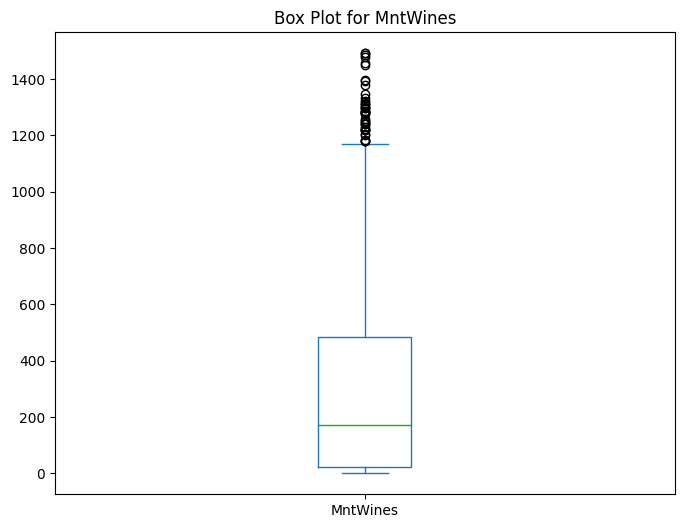

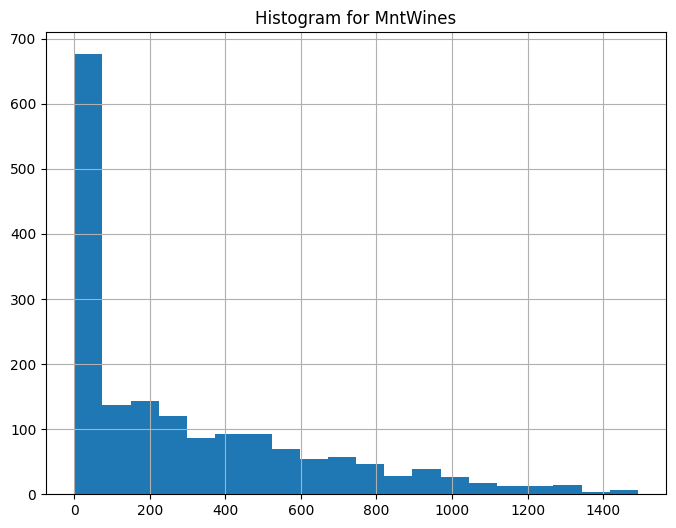


Analyzing column: NumCatalogPurchases


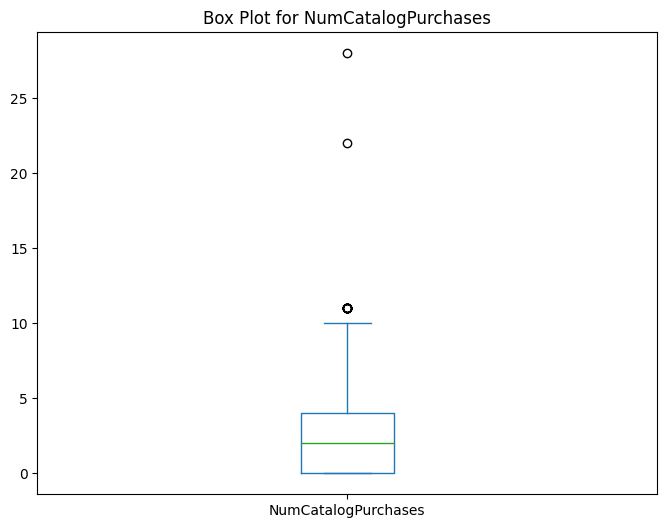

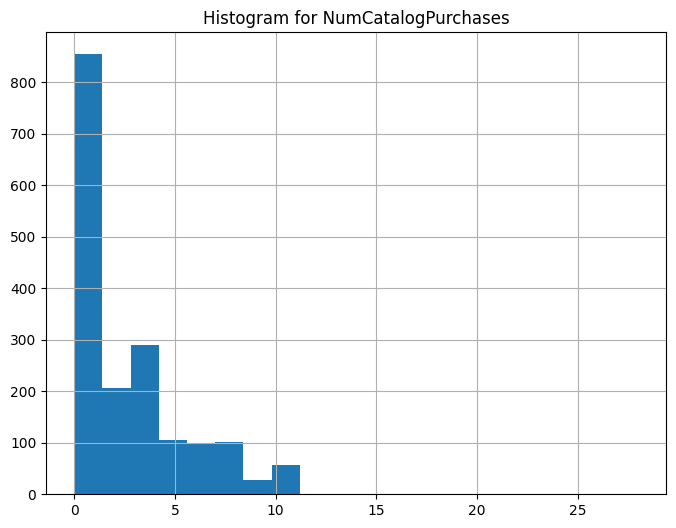


Analyzing column: NumDealsPurchases


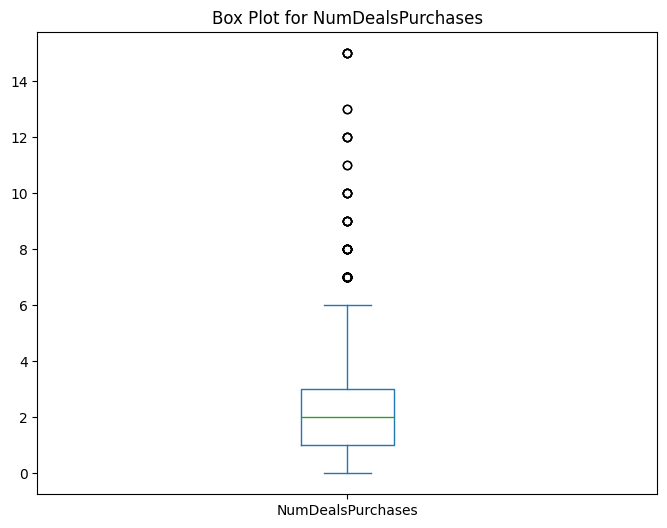

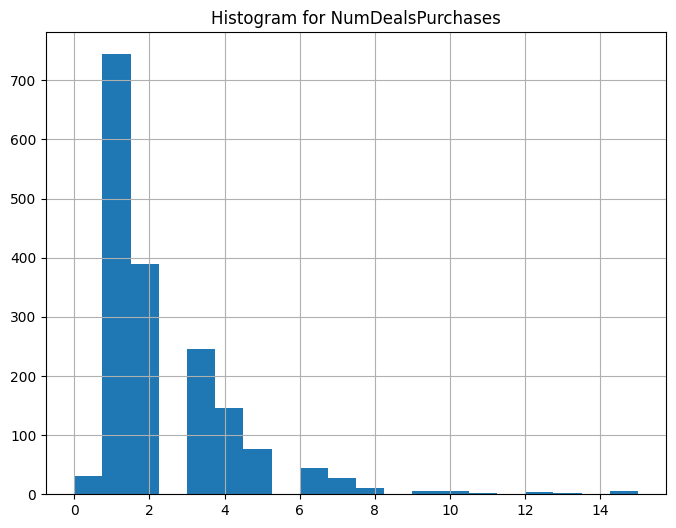


Analyzing column: NumStorePurchases


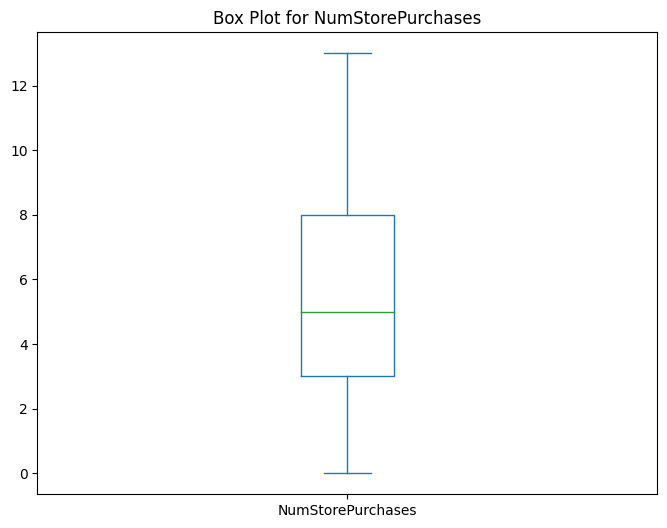

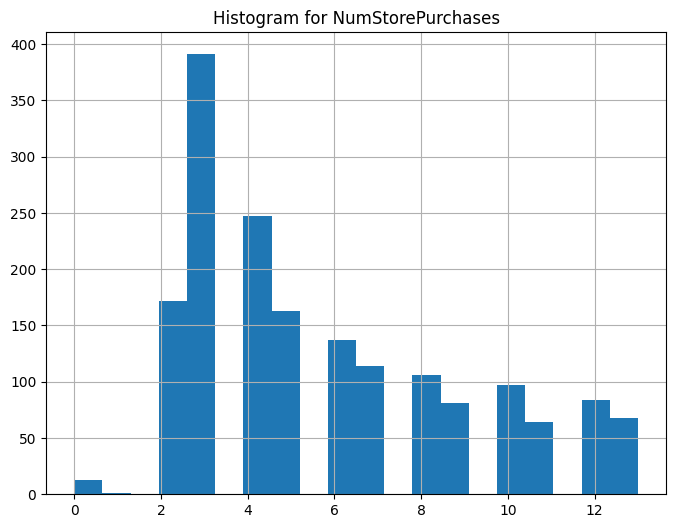


Analyzing column: NumWebPurchases


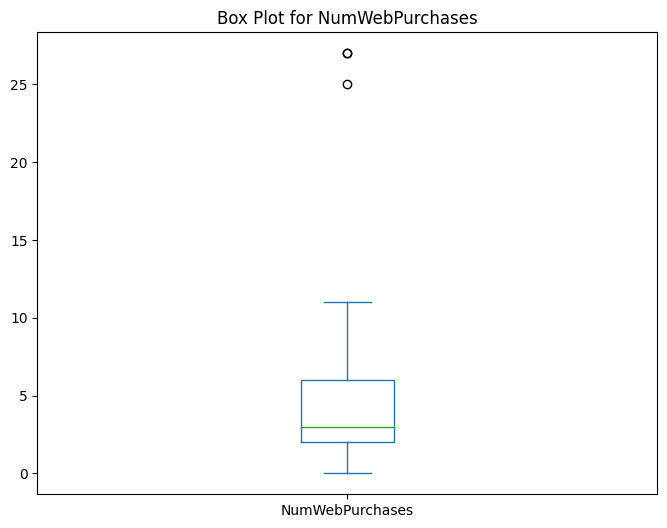

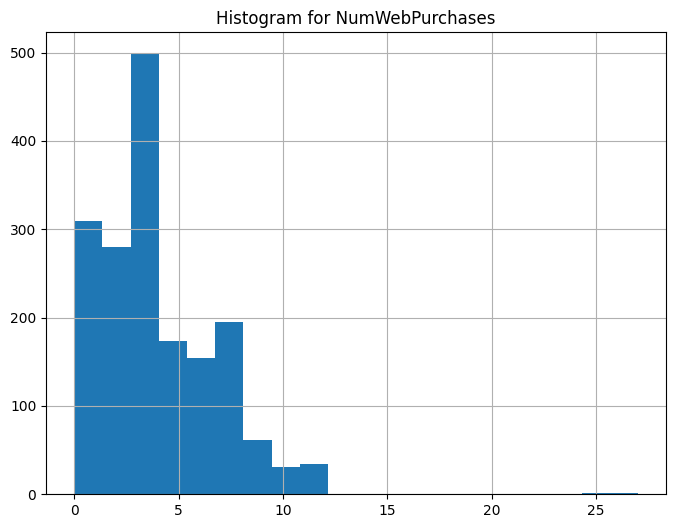


Analyzing column: NumWebVisitsMonth


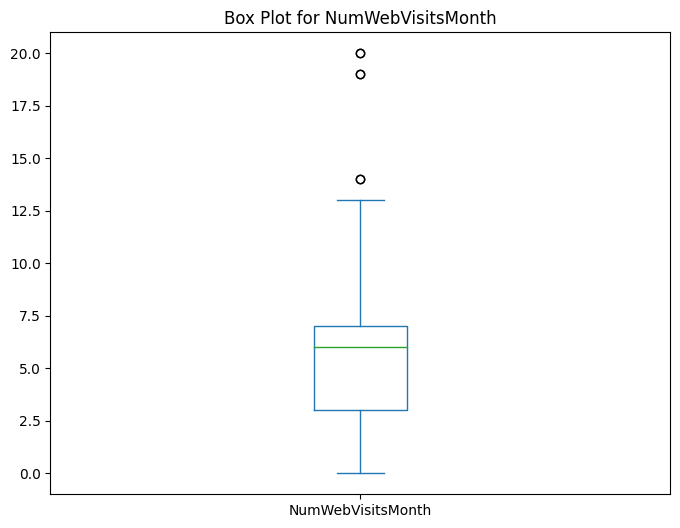

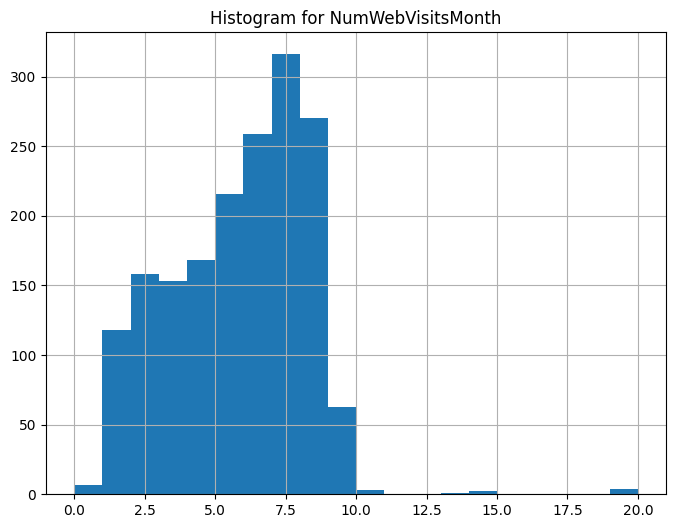


Analyzing column: Recency


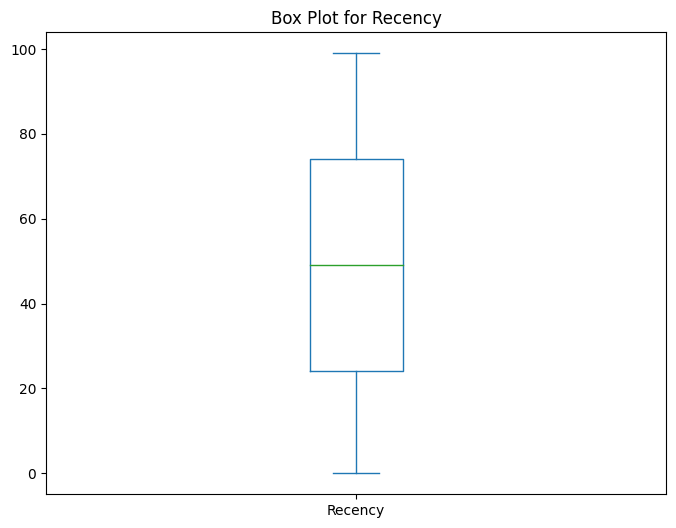

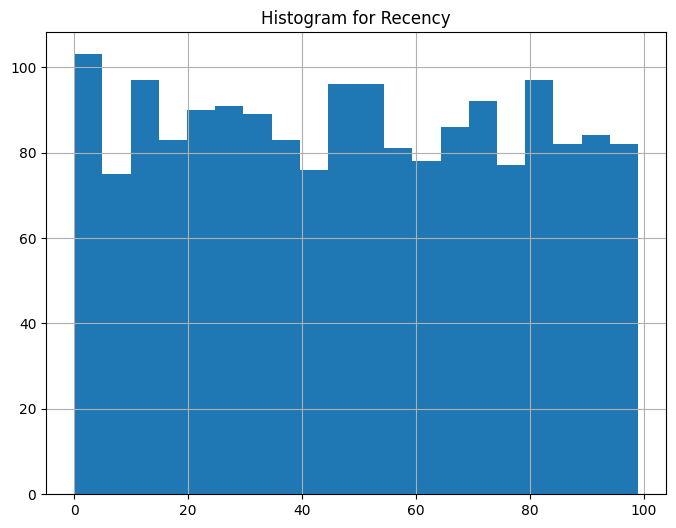


Analyzing column: Teenhome


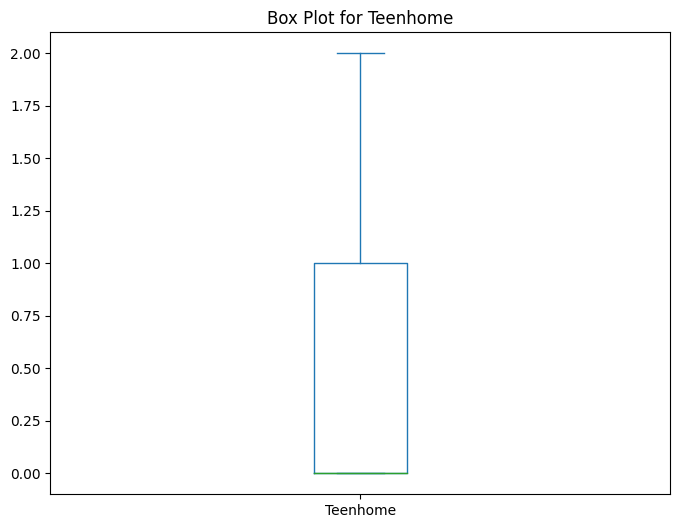

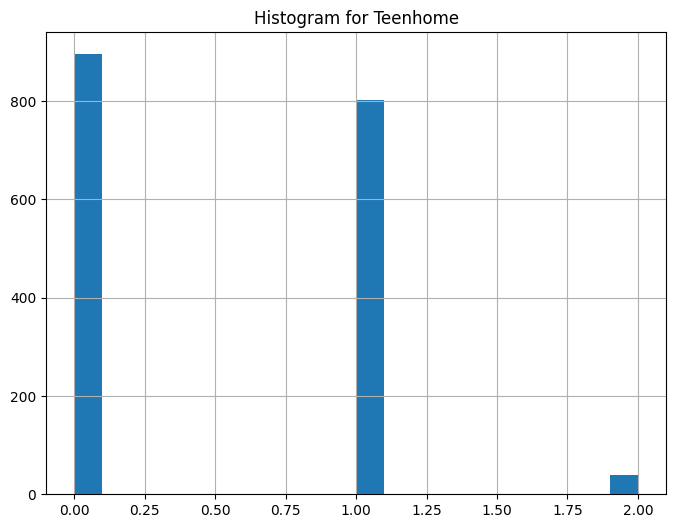


Analyzing column: Total_Children


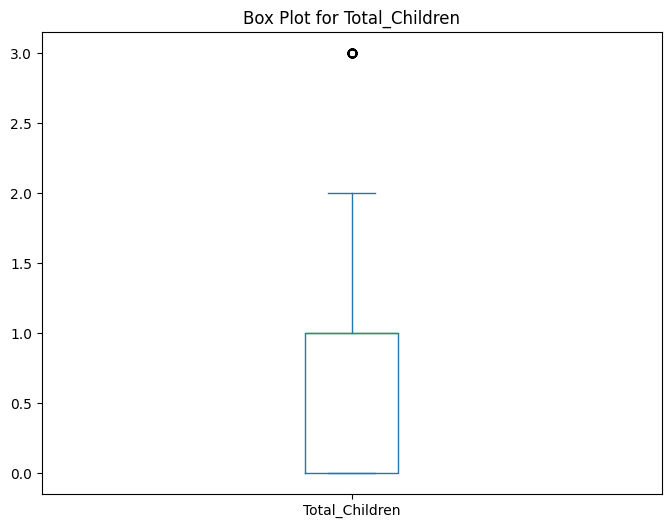

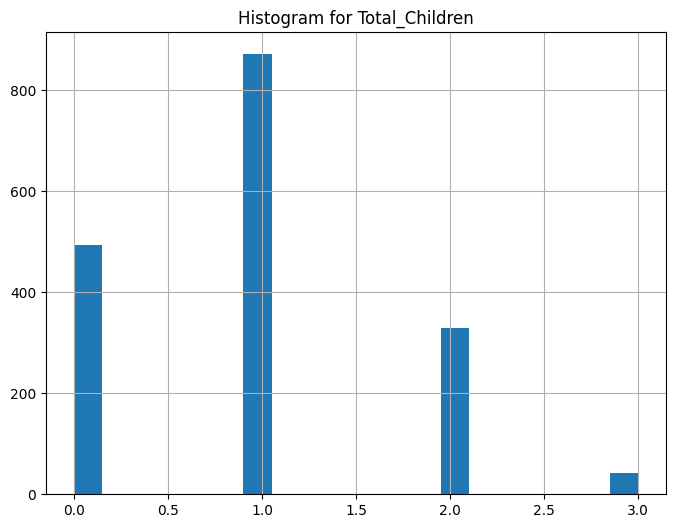


Analyzing column: Total_Spending


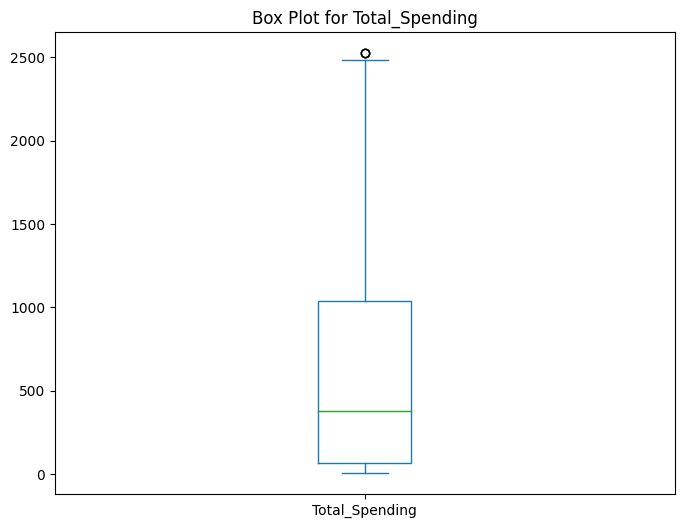

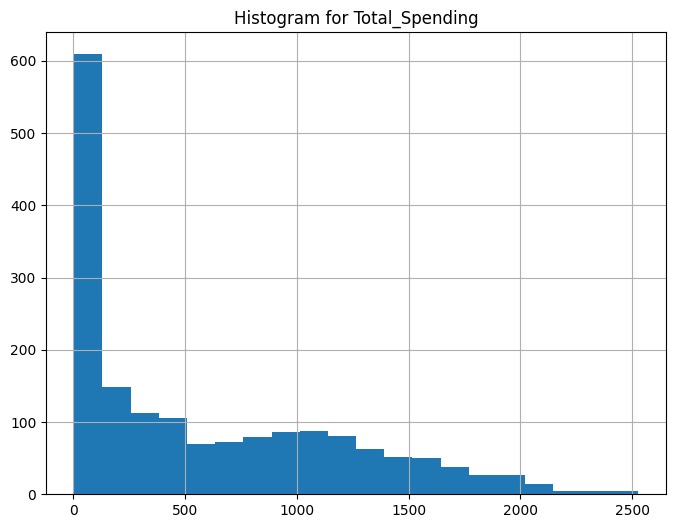


Analyzing column: Year_Birth


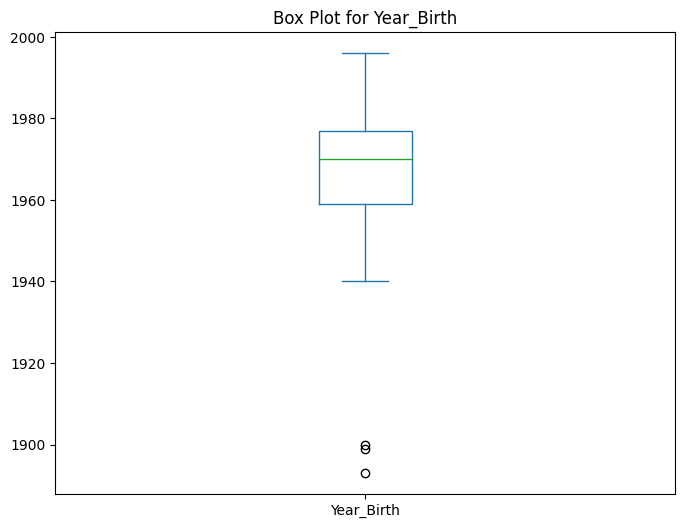

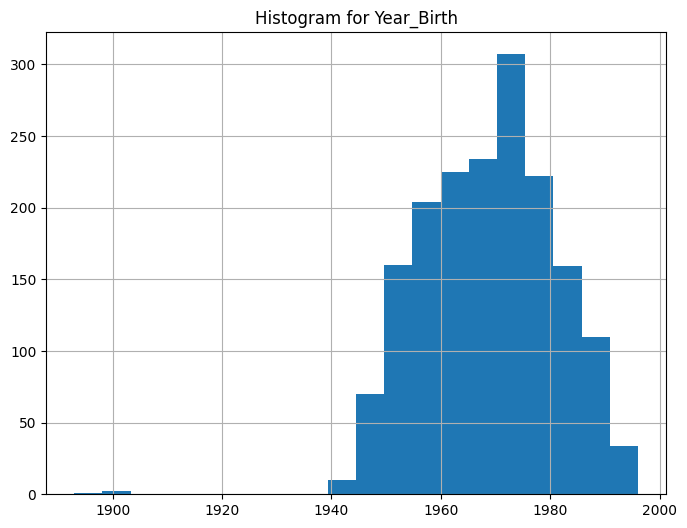

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1738 entries, 0 to 1737
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1738 non-null   int64  
 1   ID                   1738 non-null   int64  
 2   Income               1738 non-null   float64
 3   Kidhome              1738 non-null   int64  
 4   MntFishProducts      1738 non-null   float64
 5   MntFruits            1738 non-null   float64
 6   MntGoldProds         1738 non-null   float64
 7   MntMeatProducts      1738 non-null   float64
 8   MntSweetProducts     1738 non-null   float64
 9   MntWines             1738 non-null   int64  
 10  NumCatalogPurchases  1738 non-null   int64  
 11  NumDealsPurchases    1738 non-null   int64  
 12  NumStorePurchases    1738 non-null   int64  
 13  NumWebPurchases      1738 non-null   int64  
 14  NumWebVisitsMonth    1738 non-null   int64  
 15  Recency              1738 non-null   i

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Total_Children,Age,Total_Spending,Education_Encoded
count,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,...,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000
mean,6268.304373,1968.800921,51702.198354,0.447066,0.508055,48.836594,294.445339,21.130898,148.198216,30.845512,...,0.071922,0.070771,0.059839,0.014384,0.147296,0.010932,0.942750,55.199079,595.876223,0.598389
std,3251.884747,11.747711,20854.427150,0.540597,0.544183,28.922241,322.816915,26.528908,175.250282,38.711748,...,0.258433,0.256516,0.237256,0.119103,0.354502,0.104014,0.725811,11.747711,593.908271,0.682740
min,0.000000,1932.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,5.000000,0.000000
25%,3548.000000,1959.000000,35685.000000,0.000000,0.000000,24.000000,23.000000,1.000000,15.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,67.250000,0.000000
50%,6721.500000,1970.000000,51258.500000,0.000000,0.000000,49.000000,173.000000,8.000000,66.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,54.000000,375.000000,0.000000
75%,9152.250000,1977.000000,68385.750000,1.000000,1.000000,74.000000,483.000000,32.000000,226.000000,47.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,65.000000,1037.000000,1.000000
max,11191.000000,1996.000000,117436.875000,2.000000,2.000000,99.000000,1173.000000,78.500000,542.500000,114.500000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.500000,92.000000,2491.625000,2.000000


In [ ]:

import scipy.stats as stats
df.columns

# Identify numerical columns for analysis
#Exclude your binaries . they got reset to zero with automated Winsorization
exclude_list = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain']
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.difference(exclude_list)

#numerical_columns = df.select_dtypes(include=['int64', 'float64']) ---- this didnt work
# Careful with outlier check on binary columns. It will set them to zero
# Create a function for outlier detection and treatment
def detect_and_treat_outliers(column):
    """
    Detects outliers in a numerical column using IQR and removes or winsorizes them.

    Args:
        column: The numerical column to analyze.

    Returns:
        The cleaned column with outliers removed or winsorized.
    """

    # Calculate IQR and quantiles
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1

    # Identify potential outliers (values beyond 1.5 IQR from quartiles)
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = column[(column < lower_bound) | (column > upper_bound)]


    # Using clip

    cleaned_column = column.clip(lower_bound, upper_bound,axis=0)

    return cleaned_column
clean_df=pd.DataFrame()

# Detect and treat outliers (use the chosen method from the function)

clean_df[column] = detect_and_treat_outliers(df[column])
df[column] = detect_and_treat_outliers(df[column])
clean_df.info()
clean_df.describe()
df.describe()

# Save the cleaned DataFrame if needed
# cleaned_df.to_csv('cleaned_data.csv', index=False)



In [ ]:
condition = clean_df['Income'] > 68655
df_sorted = clean_df[condition].sort_values(by='Income')

# Display the sorted DataFrame
print(df_sorted['Income'])

1047     68657.000
1158     68695.000
540      68695.000
608      68743.000
858      68805.000
           ...    
574     113734.000
1322    117436.875
610     117436.875
1573    117436.875
1494    117436.875
Name: Income, Length: 429, dtype: float64


write my cleanedd df to new file clean_marketing.csv

In [ ]:
clean_df.to_csv('/content/drive/My Drive/Dataset/clean_marketing.csv', index=False)

In [ ]:
# Now load the new csv in the df to keep the nomenclature same
df = pd.read_csv(file_path)
df.describe()
list(df)

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response',
 'Complain',
 'Country']

#Ordinal Encoding and Heat Map
•	Use ordinal encoding and one hot encoding according to different types of categorical variables.
The educational data is ordinal Masters>Graduate>SSC_Plus

*   Country and Marital status are changed to one hot to remove bias to encoding. This is stored in data frame data



['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Total_Children', 'Age', 'Total_Spending', 'Country_AUS', 'Country_CA', 'Country_GER', 'Country_IND', 'Country_ME', 'Country_SA', 'Country_SP', 'Country_US', 'Marital_Status_Single', 'Marital_Status_Together']


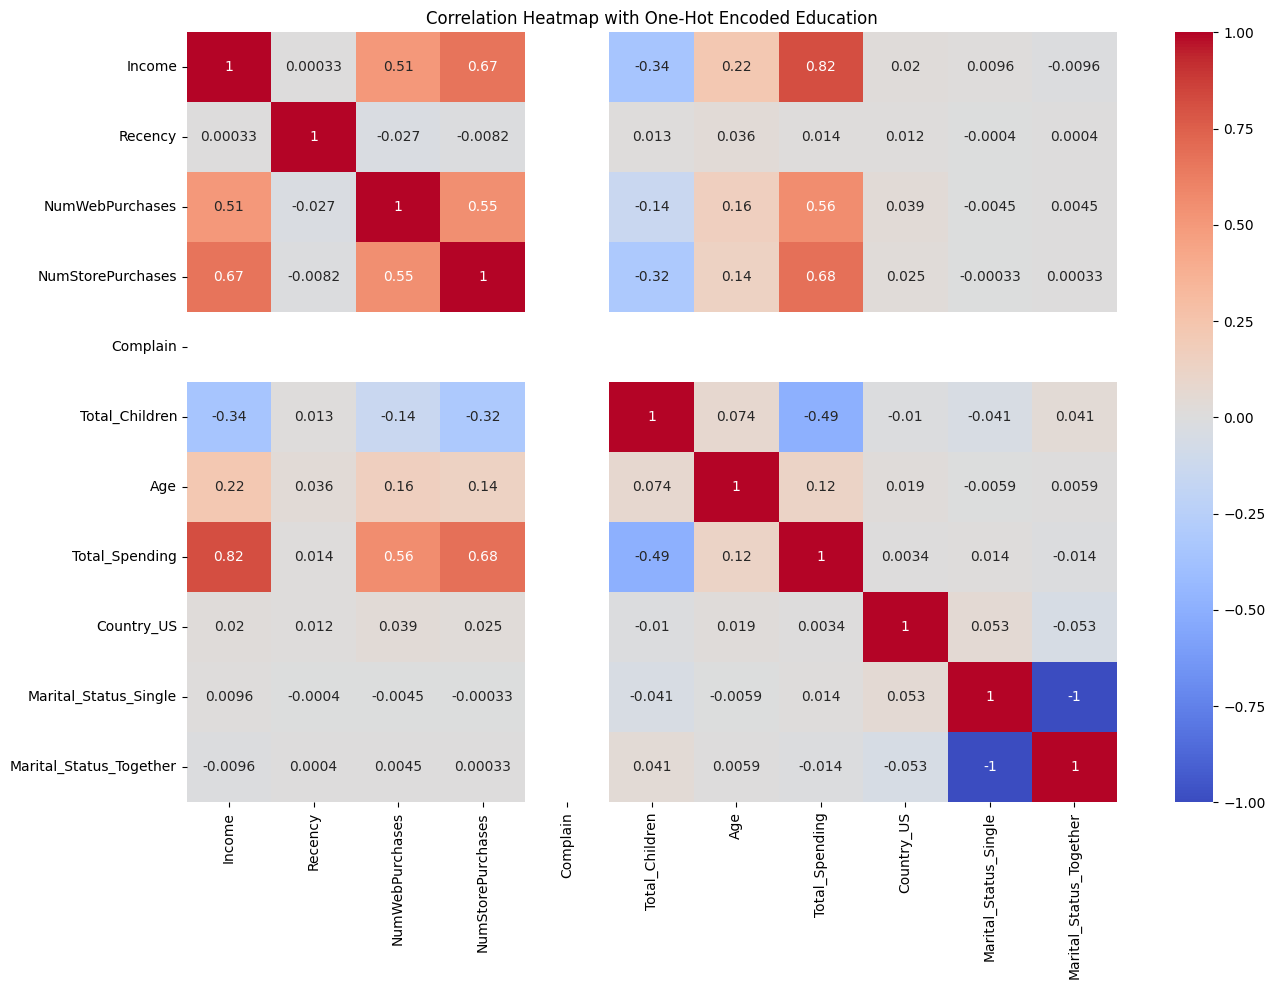

['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Total_Children', 'Age', 'Total_Spending', 'Education_Encoded']
(1738, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1738 entries, 0 to 1737
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1738 non-null   int64  
 1   Year_Birth           1738 non-null   int64  
 2   Education            1738 non-null   object 
 3   Marital_Status       1738 non-null   object 
 4   Income               1738 non-null   float64
 5   Kidhome              1738 non-nul

In [ ]:

# Define the mapping for education levels (ordinal encoding)
#Education is ordinal we rank it SSC<Grd<Master
education_mapping = {
    "SSC_Plus": 1,
    "Graduate": 2,
    "Masters": 3
}

# Apply the mapping to the 'Education' column
df['Education_Encoded'] = df['Education'].replace(education_mapping)

# Encode categorical variables appropriately (ordinal vs. one-hot)
df['Education_Encoded'] = df['Education'].astype('category').cat.codes

# Encoding for non ordinal data

encoded_df = pd.get_dummies(df, columns=['Country', 'Marital_Status'])  # How to do one-hot encoding
encoded_df.head()
dummy_columns = [col for col in encoded_df.columns if col.startswith('Country_') or col.startswith('Marital_Status_')]
filtered_df = encoded_df[dummy_columns]

# Combine original and encoded DataFrames
df_with_encoded = pd.concat([clean_df, filtered_df], axis=1)

# Select numerical columns for correlation
numerical_columns = [col for col in df_with_encoded.columns if col not in ("Education",'Country','Marital_Status')]
print(numerical_columns)
# Reduce the numerical columns in the plot to managable. Cloose from numerical columns
list_col=['Income', 'Recency',
           'NumWebPurchases',  'NumStorePurchases',
           'Complain',
          'Total_Children', 'Age', 'Total_Spending', 'Country_US', 'Marital_Status_Single', 'Marital_Status_Together']
# Calculate correlation matrix
correlation = df_with_encoded[list_col].corr()

# Create the heatmap using Seaborn for better control and colorbar
plt.figure(figsize=(15, 10))  # Set the figure size (adjust as needed)
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap with One-Hot Encoded Education")
plt.show()




# Visualize data distributions and correlations to assess normality, outliers, and relationships
#
print(df.columns.tolist())
print(df.shape)
print(df.info())

#Hypothesis: Older ppl like stores
Null hypotheis: There is no evidence of association between age and store purchase. Using the Chi square test. As sample size is large and the test is fastest. May not be ideal as this is interval and ratio data.

In [ ]:
from scipy.stats import chi2_contingency
# Test hypothesis 1: Older people prefer in-store shopping
# Use appropriate tests like Chi-squared or Kruskal-Wallis depending on data distributions
contingency_table = pd.crosstab(df['Age'], df['NumStorePurchases'])
chi2_stat, pval, exp_freq, obs_freq = chi2_contingency(contingency_table)
print("Chi-squared test statistic:", chi2_stat)
print("p-value:", pval)  # Interpret the p-value to draw conclusions
if pval<0.05:
    print('reject the null hypothesis, meaning theres /n significant evidence of an association between age and in-store purchases')
else: print('we fail to reject the null hypothesis /n suggesting no statistically significant association')





Chi-squared test statistic: 873.8760718711274
p-value: 0.00015246521265841113
reject the null hypothesis, meaning theres /n significant evidence of an association between age and in-store purchases


#Hypothesis 2 testing customer with kids
Which is the best method? Cji Square or logistic regression.
Null hyothesis: There is no difference between people without kids making online purchase and people with kids making online purchase
Chi square code

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency



# Create binary variable for having kids (combining Kidhome and Teenhome if needed)
has_kids = df["Kidhome"] + df["Teenhome"] >= 1

# Contingency table (cross-tabulation)
contingency_table = pd.crosstab(has_kids, df['NumWebPurchases'])

# Chi-square test
chi2, pval, a, b = chi2_contingency(contingency_table)

print("Chi-square test statistics:")
print(f"Chi-square: {chi2:.2f}")
print(f"p-value: {pval:.4f}")

# Interpretation
if pval < 0.05:
    print("There is a statistically significant association between having kids and online shopping.")
else:
    print("There is no statistically significant association between having kids and online shopping.")


Chi-square test statistics:
Chi-square: 95.78
p-value: 0.0000
There is a statistically significant association between having kids and online shopping.


Proving Hypothesis 2 with Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder



# Create binary variable for having kids (combining Kidhome and Teenhome if needed)
df["has_kids"] = df["Kidhome"] + df["Teenhome"] >= 1


# Encode categorical variables (Education and Country) using OneHotEncoder
#encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
#encoded_df = pd.concat([df[["NumWebPurchases",  "NumStorePurchase", "NumCatlogPurchase"]],has_kids,
#pd.DataFrame(encoder.fit_transform(df[["Education", "Country"]]), columns=encoder.get_feature_names(["Education", "Country"]))], axis=1)
encoded_df=pd.concat([df_with_encoded,df['has_kids']],axis=1)
# Define features and target variable
features = ["has_kids", "NumStorePurchase", "NumCatlogPurchase"] + list(encoded_df.columns)[6:]
target = "NumWebPurchases"
#list(encoded_df)
#encoded_df.head()
#encoded_df.iloc[:,0]

# Create and fit the model
model = LogisticRegression()
model.fit(encoded_df.iloc[:, [37,15,14]], encoded_df.iloc[:, 13])
#model.fit(encoded_df.loc['has_kids','NumCatalogPurchases'], encoded_df.loc['NumWebPurchases'])

# Print coefficients and interpret
print("Logistic regression coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef[0]:.2f}")

# Interpretation
positive_coefs = []
negative_coefs = []

has_kids_coef = model.coef_[0,0]
print('The coeff of the model is:  ',has_kids_coef)


if has_kids_coef > 0:
    print("Customers with kids tend to have higher online purchases.")
elif has_kids_coef < 0:
    print("Customers with kids tend to have lower online purchases.")
else:
    print("Having kids has no significant impact on online purchases.")



Logistic regression coefficients:
has_kids: -0.59
NumStorePurchase: -0.86
NumCatlogPurchase: -0.87
MntWines: -0.92
MntFruits: -0.93
MntMeatProducts: -0.26
MntFishProducts: 0.39
MntSweetProducts: 0.38
MntGoldProds: 1.04
NumDealsPurchases: 0.60
NumWebPurchases: 0.52
NumCatalogPurchases: 0.95
NumStorePurchases: 0.55
The coeff of the model is:   -0.5852080516653306
Customers with kids tend to have lower online purchases.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Hypothesis Distr Channels cannibalise sales at store

##Multiple comparison
- Perform three t-tests:
    - Store vs. Online/Catalog
    - Store vs. Both
    - Online/Catalog vs. Both
- Apply Bonferroni correction to adjust p-values for multiple comparisons and control for Type I error.
- This method highlights specific groups with significant differences but might be conservative.

In [ ]:
from scipy.stats import ttest_ind

# Define groups
store_only = df[df["NumWebPurchases"] + df["NumCatalogPurchases"] == 0]
#debug

online_catalog = df[df["NumWebPurchases"] + df["NumCatalogPurchases"] >= 1]
both = df.query("NumWebPurchases + NumCatalogPurchases >= 1 and NumStorePurchases >= 1")

#both = df[(df["NumWebPurchases"] + df["NumCatalogPurchases"]) >= 1 & df["NumStorePurchases"] >= 1]

# Test store sales between groups with Bonferroni correction
corrected_alpha = 0.05 / 3  # Adjust alpha for 3 comparisons
store_only_sales_mean = store_only["Total_Spending"].mean()

_, p1 = ttest_ind(store_only["Total_Spending"], online_catalog["Total_Spending"], equal_var=False)
if p1 < corrected_alpha:
    print("Store sales differ between store-only and online/catalog groups (p1", p1, ")")

_, p2 = ttest_ind(store_only["Total_Spending"], both["Total_Spending"], equal_var=False)
if p2 < corrected_alpha:
    print("Store sales differ between store-only and both groups (p2", p2, ")")

_, p3 = ttest_ind(online_catalog["Total_Spending"], both["Total_Spending"], equal_var=False)
if p3 < corrected_alpha:
    print("Store sales differ between online/catalog and both groups (p3", p3, ")")



Store sales differ between store-only and online/catalog groups (p1 6.999510059224187e-12 )
Store sales differ between store-only and both groups (p2 6.9874358970901244e-12 )


##Multinominal Logistic Regression
Model store purchases as the dependent variable with three categories (only store, any online/catalog, both).
- Include control variables like income, age, or product category.
- Analyze coefficients to interpret how online/catalog purchases affect store purchase probability while controlling for other factors.
- Provides direction and strength of effects but assumes categorical store purchase variable.

In [ ]:
try:
  from sklearn.linear_model import MultinomialLogit
  print("MultinomialLogit is already available!")
except ImportError:
  print("MultinomialLogit not found. We'll install it for you.")


MultinomialLogit not found. We'll install it for you.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

# Encode channel types (dummy variables)
#encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
#encoded_df = pd.concat([df[["Total_Spending"]], pd.DataFrame(encoder.fit_transform(df[["NumStorePurchase", "NumWebPurchases", "NumCatlogPurchase"]]), columns=encoder.get_feature_names(["Store", "Web", "Catalog"]))], axis=1)

# Define features and target variable
features = list(encoded_df.columns)[1:]
target = "NumStorePurchases"  # Convert store purchases to categorical (e.g., high, medium, low)

# Create and fit the model
model = LogisticRegression()
model.fit(encoded_df[features], encoded_df[target])

# Interpret coefficients for online/catalog purchase effects on store purchase categories

# Print coefficients and interpret
print("Logistic regression coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef[0]:.2f}")


Logistic regression coefficients:
Year_Birth: 0.00
Income: -0.00
Kidhome: 0.00
Teenhome: 0.00
Recency: 0.00
MntWines: 0.00
MntFruits: 0.00
MntMeatProducts: -0.00
MntFishProducts: -0.00
MntSweetProducts: -0.00
MntGoldProds: -0.00
NumDealsPurchases: -0.00
NumWebPurchases: -0.00
NumCatalogPurchases: -0.00


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#Hypothesis US Sales better


##Two Sample T test
1. Choosing the right test:

Since I have two groups (US and Rest of World) and a continuous variable (total purchases), a simple two-sample t-test is appropriate.

2. Check normality with histogram. I have already done that in step 4 for all variables.

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind


# Filter US and Rest of World groups
us_data = df[df["Country"] == "US"]
rest_of_world_data = df[df["Country"] != "US"]

# Check assumptions (optional)
# ... (Perform normality and homogeneity tests if needed)

# Perform t-test
t_statistic, p_value = ttest_ind(us_data["Total_Spending"], rest_of_world_data["Total_Spending"], equal_var=False)

# Interpretation
print(f"T-statistic: {t_statistic:.2f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("There is a statistically significant difference in total purchases between US and Rest of World.")
    if t_statistic > 0:
        print("US has higher total purchases on average.")
    else:
        print("Rest of World has higher total purchases on average.")
else:
    print("There is no statistically significant difference in total purchases between US and Rest of World.")


T-statistic: 0.16
p-value: 0.8753
There is no statistically significant difference in total purchases between US and Rest of World.


#**Visualisation**

o	Which products are performing the best, and which are performing the least in terms of revenue?
This has to be a pie chart

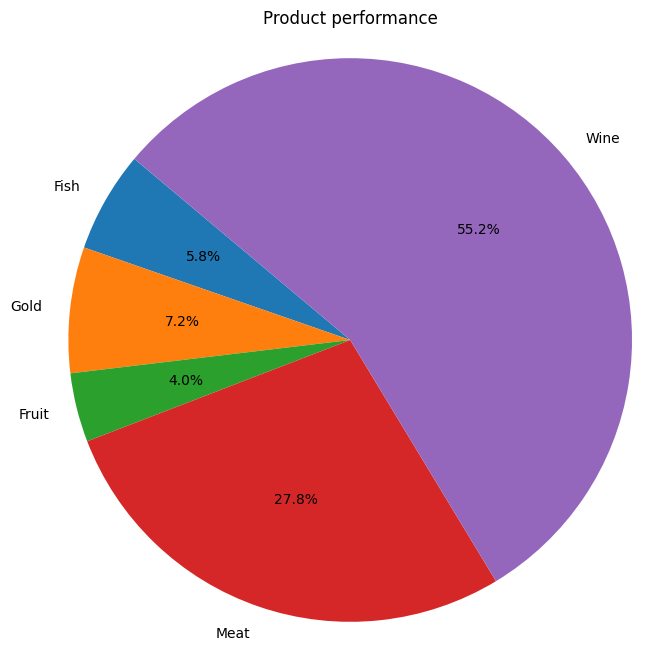

In [ ]:
# Get the sum of the Products in a dic
data = {'values': [df['MntFishProducts'].sum(), df['MntGoldProds'].sum(),df['MntFruits'].sum(),df['MntMeatProducts'].sum(),df['MntWines'].sum()],
        'labels': ['Fish', 'Gold','Fruit','Meat','Wine']}

plt.figure(figsize=(8, 8))  # Adjust figure size as needed
plt.pie(data['values'], autopct='%1.1f%%', startangle=140, labels=data['labels'])
plt.title('Product performance')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show()


##Age Vs Last campaign Visualisation

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1615 entries, 0 to 1737
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1615 non-null   int64  
 1   Year_Birth           1615 non-null   int64  
 2   Education            1615 non-null   object 
 3   Marital_Status       1615 non-null   object 
 4   Income               1615 non-null   float64
 5   Kidhome              1615 non-null   int64  
 6   Teenhome             1615 non-null   int64  
 7   Dt_Customer          1615 non-null   object 
 8   Recency              1615 non-null   int64  
 9   MntWines             1615 non-null   int64  
 10  MntFruits            1615 non-null   int64  
 11  MntMeatProducts      1615 non-null   int64  
 12  MntFishProducts      1615 non-null   int64  
 13  MntSweetProducts     1615 non-null   int64  
 14  MntGoldProds         1615 non-null   int64  
 15  NumDealsPurchases    1615 non-null   i

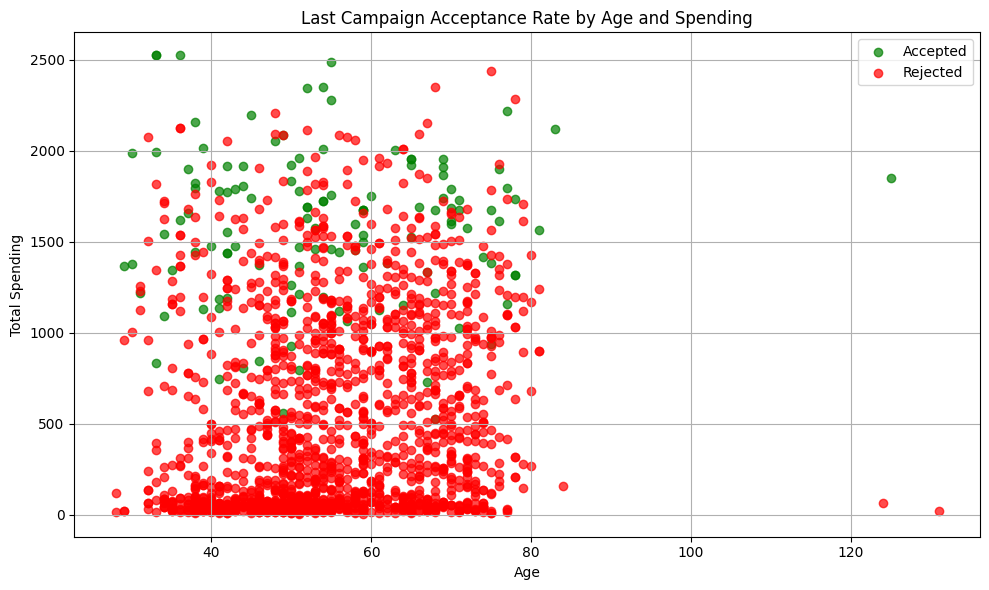

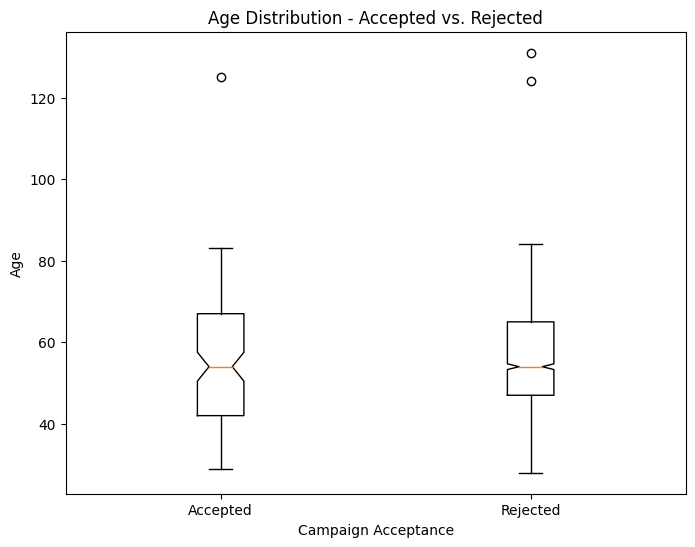

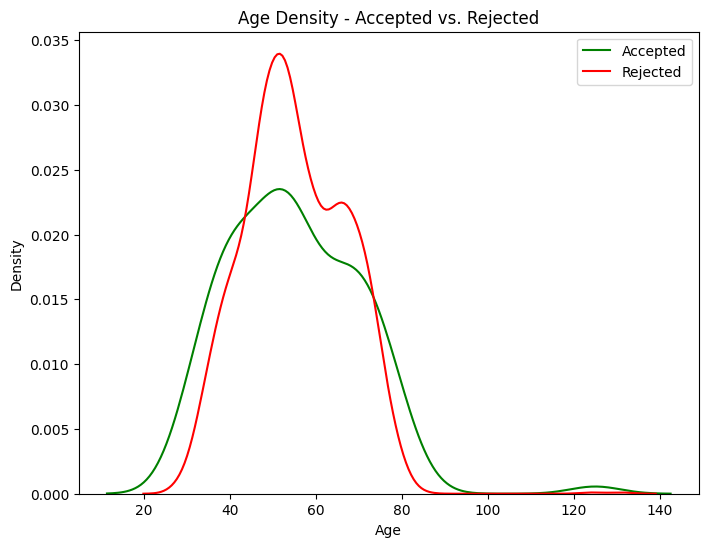

In [ ]:
df[df['AcceptedCmp5']==1].count()
df.columns
# Filter accepted and rejected customers for the last campaign
accepted_customers = df[df["AcceptedCmp5"] == 1]
rejected_customers = df[df["AcceptedCmp5"] == 0]

rejected_customers.info()
# Create separate scatter plots for accepted and rejected customers
plt.figure(figsize=(10, 6))

# Accepted customers
plt.scatter(accepted_customers["Age"], accepted_customers["Total_Spending"], color='green', label='Accepted', alpha=0.7)

# Rejected customers
plt.scatter(rejected_customers["Age"], rejected_customers["Total_Spending"], color='red', label='Rejected', alpha=0.7)

# Customize the plot
plt.xlabel("Age")
plt.ylabel("Total Spending")
plt.title("Last Campaign Acceptance Rate by Age and Spending")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Additional visualizations (optional):

# 1. Boxplot:
plt.figure(figsize=(8, 6))
plt.boxplot([accepted_customers["Age"], rejected_customers["Age"]], labels=["Accepted", "Rejected"], notch=True)
plt.xlabel("Campaign Acceptance")
plt.ylabel("Age")
plt.title("Age Distribution - Accepted vs. Rejected")
plt.show()

# 2. Density plot:
plt.figure(figsize=(8, 6))
sns.kdeplot(accepted_customers["Age"], label="Accepted", color='green')
sns.kdeplot(rejected_customers["Age"], label="Rejected", color='red')
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age Density - Accepted vs. Rejected")
plt.legend()
plt.show()


Country Vs Last Campaign acceptance

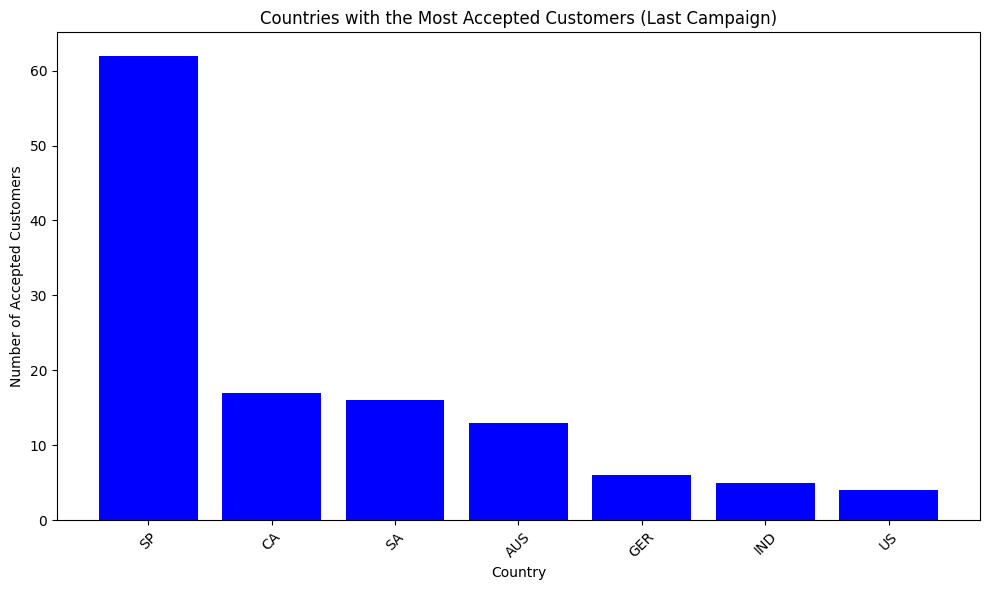

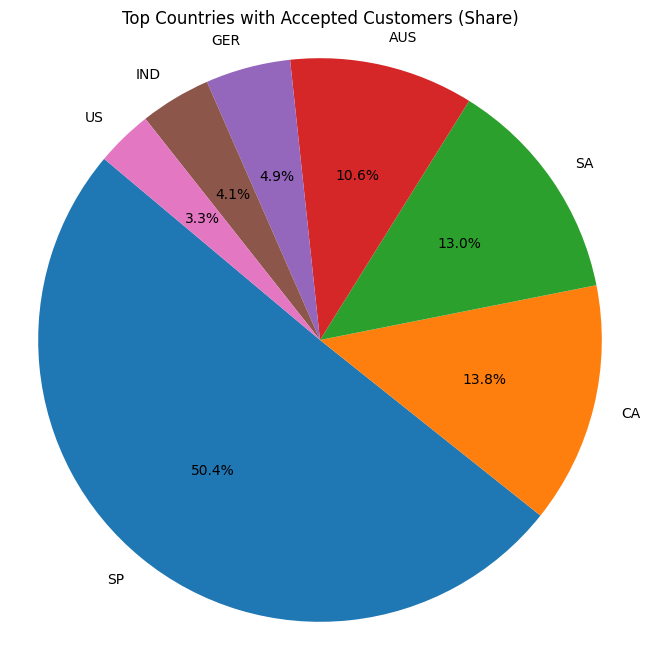

In [ ]:

# Filter customers who accepted the last campaign
accepted_customers = df[df["AcceptedCmp5"] == 1]

# Count accepted customers by country
country_counts = accepted_customers["Country"].value_counts().reset_index()
country_counts.columns = ["Country", "Count"]

# Visualization options:

# 1. Bar chart:

plt.figure(figsize=(10, 6))
plt.bar(country_counts["Country"], country_counts["Count"], color="blue")
plt.xlabel("Country")
plt.ylabel("Number of Accepted Customers")
plt.title("Countries with the Most Accepted Customers (Last Campaign)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Pie chart:

plt.figure(figsize=(8, 8))
plt.pie(country_counts["Count"], labels=country_counts["Country"], autopct="%1.1f%%", startangle=140)
plt.title("Top Countries with Accepted Customers (Share)")
plt.axis("equal")
plt.show()




##Visualizing Number of Children and Total Spends

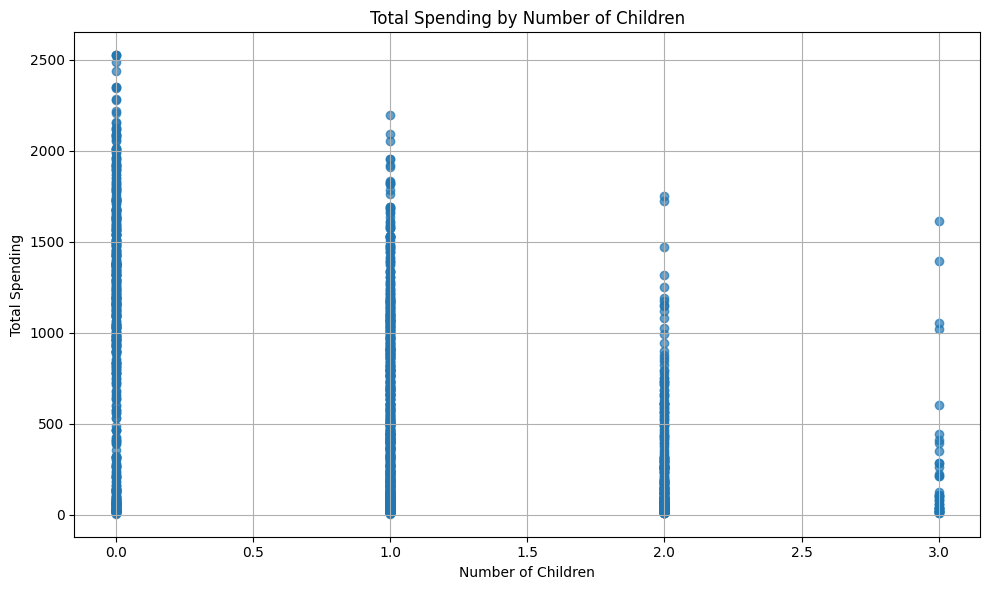

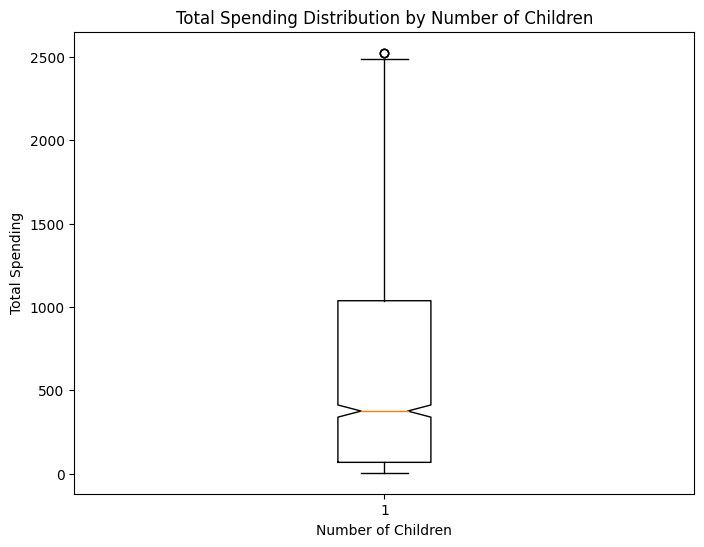

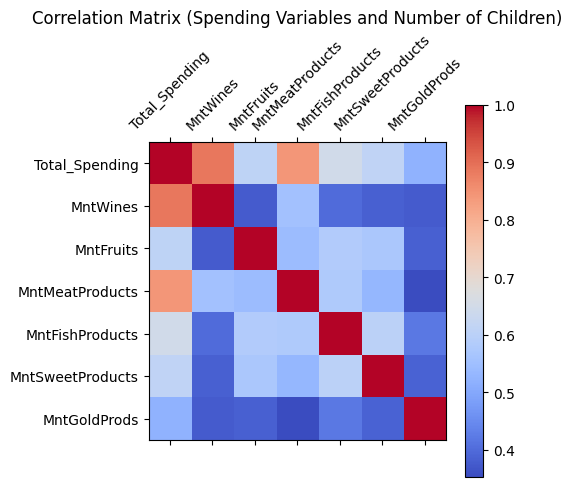

In [ ]:


# Define number of children variable (adjust if needed)
num_children = df["Kidhome"] + df["Teenhome"]

# Visualization options:

# 1. Scatter plot:

plt.figure(figsize=(10, 6))
plt.scatter(num_children, df["Total_Spending"], alpha=0.7)
plt.xlabel("Number of Children")
plt.ylabel("Total Spending")
plt.title("Total Spending by Number of Children")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Boxplot:

plt.figure(figsize=(8, 6))
plt.boxplot(df["Total_Spending"], notch=True)
plt.xlabel("Number of Children")
plt.ylabel("Total Spending")
plt.title("Total Spending Distribution by Number of Children")
plt.show()

# 3. Heatmap (if you have multiple numeric spending variables):

if "MntWines" in df.columns:
    spending_columns = ["Total_Spending", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
    correlation_matrix = df[spending_columns].corr()
    plt.matshow(correlation_matrix, cmap="coolwarm")
    plt.xticks(range(len(spending_columns)), spending_columns, rotation=45)
    plt.yticks(range(len(spending_columns)), spending_columns)
    plt.colorbar()
    plt.title("Correlation Matrix (Spending Variables and Number of Children)")
    plt.show()



visualize the educational background of customers who complained in your data

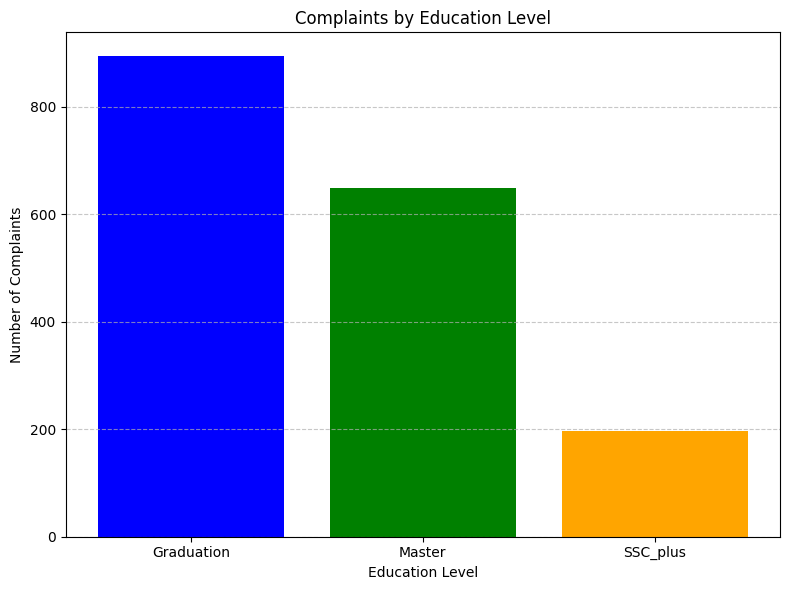

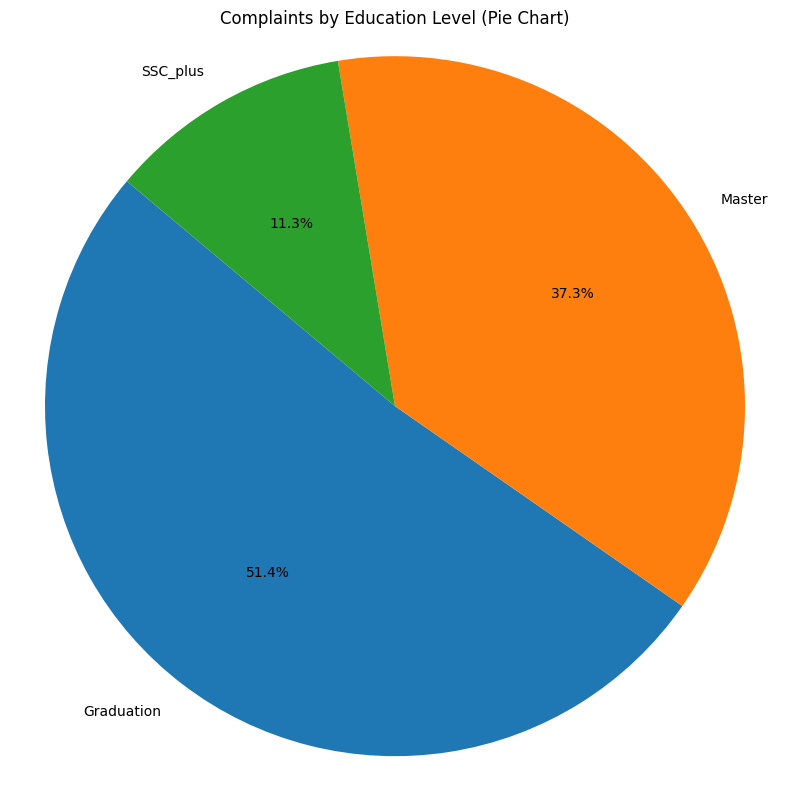

In [ ]:

df_grouped = df.groupby('Education')['Complain'].count().reset_index()

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(df_grouped['Education'], df_grouped['Complain'], color=['blue', 'green', 'orange'])
plt.xlabel('Education Level')
plt.ylabel('Number of Complaints')
plt.title('Complaints by Education Level')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Customize the chart (optional)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the chart
plt.show()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_grouped['Complain'], labels=df_grouped['Education'], autopct='%1.1f%%', startangle=140)
plt.title('Complaints by Education Level (Pie Chart)')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart

# Customize the chart (optional)
plt.tight_layout()

# Show the chart
plt.show()
